<a href="https://colab.research.google.com/github/Jahnvi99/Posture/blob/main/PROJECT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('standing_uh.csv')
df.head()

In [ ]:
df.type.unique()

array(['uh'], dtype=object)

In [ ]:
updated_df.value_counts()

knee_ax  knee_ay  knee_az  knee_gx  knee_gy  knee_gz  back_ax  back_ay  back_az  back_gx  back_gy  back_gz  chest_ax  chest_ay  chest_az  chest_gx  chest_gy  chest_gz  type  activity
 32767    32767   -10972    144      165     -655     14768     1464     6488    768       732     -1475    -15060     2732     2112      784       -1657     -2411     uh    lying       1
 15996   -904     -5056    -480      40       278     15512     2584    -7832    432      -265      115     -14452    -304      5600      432       -252       305      uh    lying       1
         -940     -5100    -464      38       275     15572     2636    -7684    272      -193      86      -14508    -396      5560      304       -264       208      uh    lying       1
                  -5080    -512      24       252     15552     2520    -7664    352      -226      69      -14444    -172      5576      368       -267       289      uh    lying       1
         -932     -5008    -528      73       310     15508     2

In [ ]:
df['type'].replace('1',1,inplace=True)

In [ ]:
updated_df=df.drop_duplicates()

In [ ]:
dup=df[df.duplicated()]

In [ ]:
dup.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,type,activity
15456,512,15704.0,520.0,-3872.0,-1747.0,-888.0,232,44,1600,-3872,-2688,-196,0,156,16,-3840,-2006,512,uh,sitting
15457,72,15364.0,2376.0,-3840.0,-2034.0,192.0,1072,15848,2696,-3584,-3040,195,48,14920,256,-3856,-3064,640,uh,sitting
15458,68,44.0,3984.0,-3584.0,-1910.0,513.0,512,14848,96,-3872,-988,54,0,36,4172,-3584,-2045,609,uh,sitting
15459,0,15272.0,324.0,-3584.0,-1919.0,208.0,784,4,580,-3584,-1920,57,384,15104,4112,-3584,-958,64,uh,sitting
15460,512,15272.0,4168.0,-3840.0,-1021.0,74.0,160,4,4148,-3568,-875,32,0,32,544,-3584,-896,678,uh,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15999,4,1536.0,1024.0,-3072.0,256.0,0.0,0,4,1056,-3056,4,264,1092,0,64,-3072,1024,512,uh,sitting
16000,2176,256.0,4192.0,-3072.0,264.0,0.0,0,14336,4128,-3072,2,0,1536,13376,4680,-3072,1028,1,uh,sitting
16001,64,14352.0,1168.0,-3040.0,1024.0,516.0,272,12352,0,-3072,2,32,0,14336,0,-3072,8,384,uh,sitting
16002,24,13328.0,1168.0,-3072.0,-2048.0,-992.0,0,13316,0,-3072,-992,-1008,0,14336,136,-3056,-878,-1024,uh,sitting


In [ ]:
x=(df.iloc[:,0:18]).join(df.iloc[:,19])

In [ ]:
x.head(10)

,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,activity
0,8476,936,252,757,708,231,-124,6672,-3560,-261,-80,100,324,7932,2664,-496,222,46,sitting
1,8512,1068,788,-437,113,-192,-120,6800,-3644,-246,-54,119,244,7960,2520,-269,23,86,sitting
2,8288,1320,1132,-1026,41,-350,-88,6816,-3628,-277,-53,114,172,7968,2416,-252,-41,98,sitting
3,8352,1272,1212,480,809,720,-12,6820,-3648,-276,-77,97,76,7908,2720,-330,-119,120,sitting
4,8260,1268,1240,-476,72,-59,-108,6752,-3692,-255,-51,138,96,7948,2400,-335,-21,105,sitting
5,8484,1384,1404,-904,363,-80,-96,6748,-3552,-307,-52,110,16,7940,2536,-322,18,60,sitting
6,8320,1432,1368,-5,-211,142,-140,6752,-3548,-243,-95,86,112,7896,2576,-342,56,95,sitting
7,8376,1396,1340,-592,-212,-98,-64,6752,-3688,-268,-72,109,-8,7936,2552,-695,833,147,sitting
8,8424,1508,1324,-145,136,297,16,6752,-3680,-280,-97,98,160,7948,2440,-402,-5,137,sitting
9,8336,1372,1312,2910,1546,1323,-52,6724,-3672,-243,-54,119,204,7888,2444,-402,32,36,sitting


In [ ]:
y=pd.DataFrame(df.iloc[:,18])
y.value_counts()

type
uh      19116
h       18303
dtype: int64

In [ ]:
y=y.replace(['uh'],1)
y=y.replace(['h'],0)
y.value_counts()

type
1       19116
0       18303
dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 42)

In [ ]:
xtrain.reset_index(drop=True,inplace=True)
xtest.reset_index(drop=True,inplace=True)
ytest.reset_index(drop=True,inplace=True)
ytrain.reset_index(drop=True,inplace=True)

In [ ]:
xtrain.head()

,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,activity
0,160,5932,-4356,1868,634,1054,-4432,-6680,48,-320,-197,94,5936,4816,4480,-344,-126,161,sleeping
1,2600,7764,980,-404,80,14,3592,7388,476,-335,-37,125,-720,8004,-84,-441,78,124,sleeping
2,7740,-252,4344,-412,-165,97,8468,-700,656,-266,-29,47,8080,292,3784,-368,139,104,sitting
3,5828,-5928,-688,-148,-291,218,2692,6112,5848,-315,-12,107,-2588,6868,-2364,-136,-24,160,sleeping
4,1608,-944,9376,-275,-126,492,-6176,-600,5928,34,-149,398,7148,1272,-3388,-259,3,123,standing


In [ ]:
le = LabelEncoder() 
le.fit(xtrain['activity']) 
xtrain['activity']=le.transform(xtrain['activity'])
xtest['activity']=le.transform(xtest['activity'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
xtrain.head(10)

,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,activity
0,160,5932,-4356,1868,634,1054,-4432,-6680,48,-320,-197,94,5936,4816,4480,-344,-126,161,1
1,2600,7764,980,-404,80,14,3592,7388,476,-335,-37,125,-720,8004,-84,-441,78,124,1
2,7740,-252,4344,-412,-165,97,8468,-700,656,-266,-29,47,8080,292,3784,-368,139,104,0
3,5828,-5928,-688,-148,-291,218,2692,6112,5848,-315,-12,107,-2588,6868,-2364,-136,-24,160,1
4,1608,-944,9376,-275,-126,492,-6176,-600,5928,34,-149,398,7148,1272,-3388,-259,3,123,2
5,704,-660,9336,-395,143,435,-7156,248,4432,-388,-31,234,7168,1280,-3580,-271,-32,83,2
6,5592,-5948,-736,-424,-78,-61,2584,6164,5872,-255,-34,111,-2792,6668,-2336,-320,-33,109,1
7,4604,1064,8064,-344,-156,76,-7616,-1508,2988,-279,-48,128,7596,676,-2956,-412,4,149,0
8,784,7460,-2268,71,-207,96,-3988,-6488,-2116,-167,5,91,5044,6200,3444,-341,-16,189,1
9,756,7456,-2260,-337,-454,-196,-3948,-6496,-1980,-543,-62,331,5056,6076,3516,-338,112,104,1


In [ ]:
enc=OneHotEncoder()
enc.fit(xtrain.activity.values.reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
enc_trdf=pd.DataFrame(enc.transform(xtrain.activity.values.reshape(-1,1)).toarray())

In [ ]:
xtrain=xtrain.iloc[:,0:18].join(enc_trdf)

In [ ]:
xtrain.head(10)

,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,0,1,2
0,160,5932,-4356,1868,634,1054,-4432,-6680,48,-320,-197,94,5936,4816,4480,-344,-126,161,0.0,1.0,0.0
1,2600,7764,980,-404,80,14,3592,7388,476,-335,-37,125,-720,8004,-84,-441,78,124,0.0,1.0,0.0
2,7740,-252,4344,-412,-165,97,8468,-700,656,-266,-29,47,8080,292,3784,-368,139,104,1.0,0.0,0.0
3,5828,-5928,-688,-148,-291,218,2692,6112,5848,-315,-12,107,-2588,6868,-2364,-136,-24,160,0.0,1.0,0.0
4,1608,-944,9376,-275,-126,492,-6176,-600,5928,34,-149,398,7148,1272,-3388,-259,3,123,0.0,0.0,1.0
5,704,-660,9336,-395,143,435,-7156,248,4432,-388,-31,234,7168,1280,-3580,-271,-32,83,0.0,0.0,1.0
6,5592,-5948,-736,-424,-78,-61,2584,6164,5872,-255,-34,111,-2792,6668,-2336,-320,-33,109,0.0,1.0,0.0
7,4604,1064,8064,-344,-156,76,-7616,-1508,2988,-279,-48,128,7596,676,-2956,-412,4,149,1.0,0.0,0.0
8,784,7460,-2268,71,-207,96,-3988,-6488,-2116,-167,5,91,5044,6200,3444,-341,-16,189,0.0,1.0,0.0
9,756,7456,-2260,-337,-454,-196,-3948,-6496,-1980,-543,-62,331,5056,6076,3516,-338,112,104,0.0,1.0,0.0


In [ ]:
xtrain.rename(columns={0:'activity_0',1:'activity_1',2:'activity_2'},inplace=True)

In [ ]:
enc_tedf=pd.DataFrame(enc.transform(xtest.activity.values.reshape(-1,1)).toarray())
xtest=xtest.iloc[:,0:18].join(enc_tedf)
xtest.rename(columns={0:'sitting',1:'sleeping',2:'standing'},inplace=True)
xtest.head()

,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,sitting,sleeping,standing
0,7264,668,5444,-264,-76,104,52,6756,-3496,-368,-23,103,72,7236,4752,-390,48,110,1.0,0.0,0.0
1,876,7268,-2488,-539,39,119,-4048,-6496,-2008,-404,87,306,4952,6124,3496,-328,13,17,0.0,1.0,0.0
2,2708,7656,1624,-67,-201,36,-5520,376,6684,-314,-130,121,-2720,1004,8424,-493,-142,85,0.0,0.0,1.0
3,1920,-1084,8820,-254,-435,199,-6236,-672,6056,-396,-90,113,7212,1172,-3320,-309,-65,114,0.0,0.0,1.0
4,3804,7236,2016,-367,86,100,804,7860,-712,-181,548,203,928,-8084,-112,-233,-67,269,0.0,1.0,0.0


In [ ]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(xtrain,ytrain.values.ravel())


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
import pickle
filename = 'logistic_regression_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
import pickle
logreg=pickle.load(open('logistic_regression_model.sav','rb'))

In [ ]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))
print("F1 Score:",metrics.f1_score(ytest, y_pred))

Accuracy: 0.9900587920897915
Precision: 0.990414669722859
Recall: 0.9902083333333334
F1 Score: 0.9903114907802897


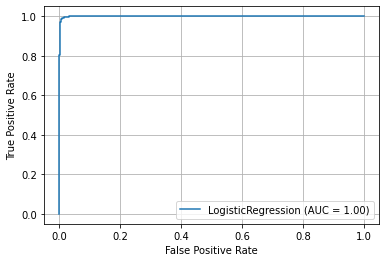

In [ ]:
metrics.plot_roc_curve(logreg,xtest,ytest)
plt.grid()
plt.savefig("log_roc.jpg")
plt.show()

In [ ]:
y_pred_train=logreg.predict(xtrain)
print("Accuracy:",metrics.accuracy_score(ytrain, y_pred_train))
print("Precision:",metrics.precision_score(ytrain, y_pred_train))
print("Recall:",metrics.recall_score(ytrain, y_pred_train))
print("F1 Score:",metrics.f1_score(ytrain, y_pred_train))

Accuracy: 0.9886687571265679
Precision: 0.990194705140776
Recall: 0.9875663593182453
F1 Score: 0.9888787857592503


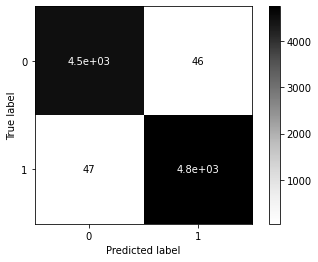

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,xtest,ytest,cmap=plt.cm.Greys)
plt.savefig('lr.jpg')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(xtrain)
xtrain = scaling.transform(xtrain)
xtest = scaling.transform(xtest)

In [ ]:
from sklearn import svm

svmmodel = svm.SVC(kernel='linear') # Linear Kernel
svmmodel.fit(xtrain, ytrain.values.ravel())
y_pred_svm = svmmodel.predict(xtest)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn import svm

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
    n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
   
    plt.grid()
   
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1,
    color="r")
   
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
    label="Training score")
   
    plt.legend(loc="best")
    return plt

estimator = svm.SVC(kernel='linear') # Linear Kernel

plot_learning_curve(estimator, "kuch bhi", xtrain,ytrain.values.ravel())

plt.show()

In [ ]:
import pickle
filename = 'svm_model.sav'
pickle.dump(svmmodel, open(filename, 'wb'))

In [ ]:
import pickle
clf=pickle.load(open('svm_model.sav','rb'))

In [ ]:
y_pred_svm=clf.predict(xtest)

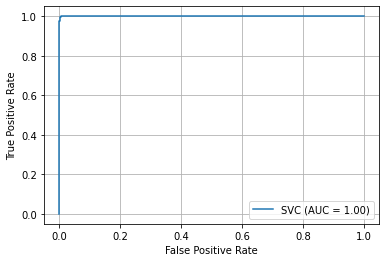

In [ ]:
metrics.plot_roc_curve(clf,xtest,ytest)
plt.grid()
plt.savefig("svm_roc.jpg")
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred_svm))
print("Precision:",metrics.precision_score(ytest, y_pred_svm))
print("Recall:",metrics.recall_score(ytest, y_pred_svm))
print("F1 Score:",metrics.f1_score(ytest, y_pred_svm))

Accuracy: 0.997434526990914
Precision: 0.9966722129783694
Recall: 0.9983333333333333
F1 Score: 0.9975020815986677


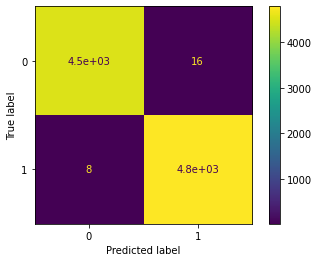

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,xtest,ytest)
plt.savefig('svm.jpg')
plt.show()

In [ ]:
y_pred_svm_train=svmmodel.predict(xtrain)

In [ ]:
print("Accuracy:",metrics.accuracy_score(ytrain, y_pred_svm_train))
print("Precision:",metrics.precision_score(ytrain, y_pred_svm_train))
print("Recall:",metrics.recall_score(ytrain, y_pred_svm_train))
print("F1 Score:",metrics.f1_score(ytrain, y_pred_svm_train))

Accuracy: 0.9981114595210946
Precision: 0.9972805243706855
Recall: 0.9990220732048058
F1 Score: 0.9981505391352898


In [ ]:
ytest.value_counts()

type
1       4800
0       4555
dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(xtrain,ytrain.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
import pickle
filename = 'knn_model.sav'
pickle.dump(knnmodel, open(filename, 'wb'))

In [ ]:
knnmodel=pickle.load(open('knn_model.sav','rb'))

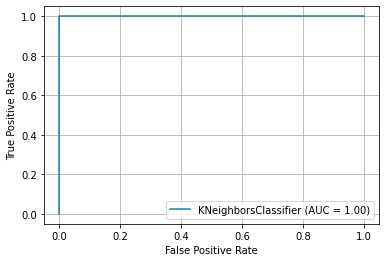

In [ ]:
import matplotlib.pyplot as plt

metrics.plot_roc_curve(knnmodel,xtest,ytest)
plt.grid()
plt.savefig("knn_roc.jpg")
plt.show()

In [ ]:
y_pred_knn=knnmodel.predict(xtest)

In [ ]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred_knn))
print("Precision:",metrics.precision_score(ytest, y_pred_knn))
print("Recall:",metrics.recall_score(ytest, y_pred_knn))
print("F1 Score:",metrics.f1_score(ytest, y_pred_knn))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


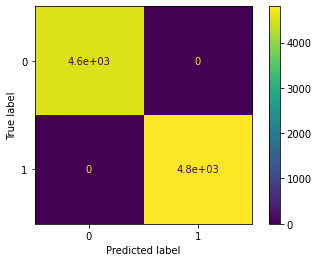

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knnmodel,xtest,ytest)
plt.savefig('knn.jpg')
plt.show()

In [ ]:
y_pred_knn_train=knnmodel.predict(xtrain)
print("Accuracy:",metrics.accuracy_score(ytrain, y_pred_knn_train))
print("Precision:",metrics.precision_score(ytrain, y_pred_knn_train))
print("Recall:",metrics.recall_score(ytrain, y_pred_knn_train))
print("F1 Score:",metrics.f1_score(ytrain, y_pred_knn_train))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_knn)

array([[4555,    0],
       [   0, 4800]])

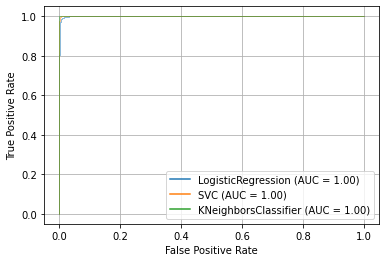

In [ ]:
from sklearn.metrics import plot_roc_curve

classifiers = [logreg, clf, knnmodel]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, xtest, ytest, ax=ax)
for line in plt.gca().lines:
  line.set_linewidth(0.5)
plt.grid()
plt.savefig("roc.jpg")
plt.show()    